In [18]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Creating a class that converts a list of values into a frequency object

class Hist:
  
  def __init__(self, list_of_values):
    self.list_of_values = list_of_values
    self.hist = {}
    for i in self.list_of_values:
      if i in self.hist:
        self.hist[i] += 1
      else:
        self.hist[i] = 1

  def get_most_frequent(self):
    max_value = max(self.hist, key=obj.get)
    return self.hist[max_value], max_value

  def print_hist(self, sort=None):
    if sort == None:
      d = self.hist
    elif sort == 'ascending':
      d = dict(sorted(self.hist.items(), key = lambda x: x[1], reverse = False))
    elif sort == 'descending':
      d = dict(sorted(self.hist.items(), key = lambda x: x[1], reverse = True))
    else:
      print("sort not recognized!")
    
    for val, freq in d.items():
      print(val, freq)
  
  def plot_hist(self, x_title=None, y_title=None):
    plt.hist(self.list_of_values)
    plt.xlabel(x_title)
    plt.ylabel(y_title);

In [20]:
# Creating a Hist object

values = [1, 2, 2, 3, 5]
hist = Hist(values)
hist.hist

In [22]:
# Printing the Hist object in a tabular form

hist.print_hist()

1 1
2 2
3 1
5 1


In [23]:
# Sorting the hist by ascending

hist.print_hist(sort='ascending')

1 1
3 1
5 1
2 2


In [24]:
# Reading in the data

pregnancies = pd.read_fwf(
  'https://raw.githubusercontent.com/tqrahman/thinkstats/main/data/2002FemPreg.dat', 
  names=['caseid', 'nbrnaliv', 'babysex', 'birthwgt_lb', 'birthwgt_oz', 'prglength', 
         'outcome', 'birthord', 'agepreg', 'finalwgt'],
  colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (57, 59),(274, 276), (276, 277), 
            (278, 279), (283, 285), (422, 439)],
)

pregnancies.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,81.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,71.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,9.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,7.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,6.0,39,1,3.0,18.0,12999.542264


In [25]:
# Getting live births

live = pregnancies[pregnancies['outcome']==1]

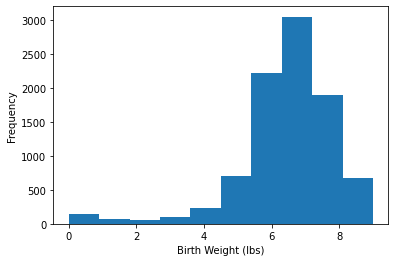

In [26]:
# Getting frequencies of live birth rates

birthweight_hist = Hist(live['birthwgt_lb'])
birthweight_hist.plot_hist('Birth Weight (lbs)', 'Frequency')

In [27]:
# Splitting data by birth order

firsts = live[live['birthord'] == 1]
others = live[live['birthord'] != 1]

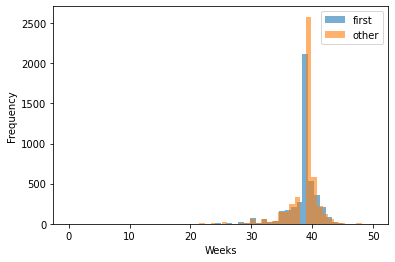

In [34]:
# Plotting hist

plt.hist(firsts['prglength'], bins=50, alpha=0.6, label="first")
plt.hist(others['prglength'], bins=50, alpha=0.6, label="other")
plt.legend(loc='upper right')
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.show()